### MNIST




Epoch 1/5


469/469 [==============================] - 3s 4ms/step - loss: 0.2678 - accuracy: 0.9234
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1078 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0701 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9783
test_acc:  0.9782999753952026
313/313 [==============================] - 1s 1ms/step


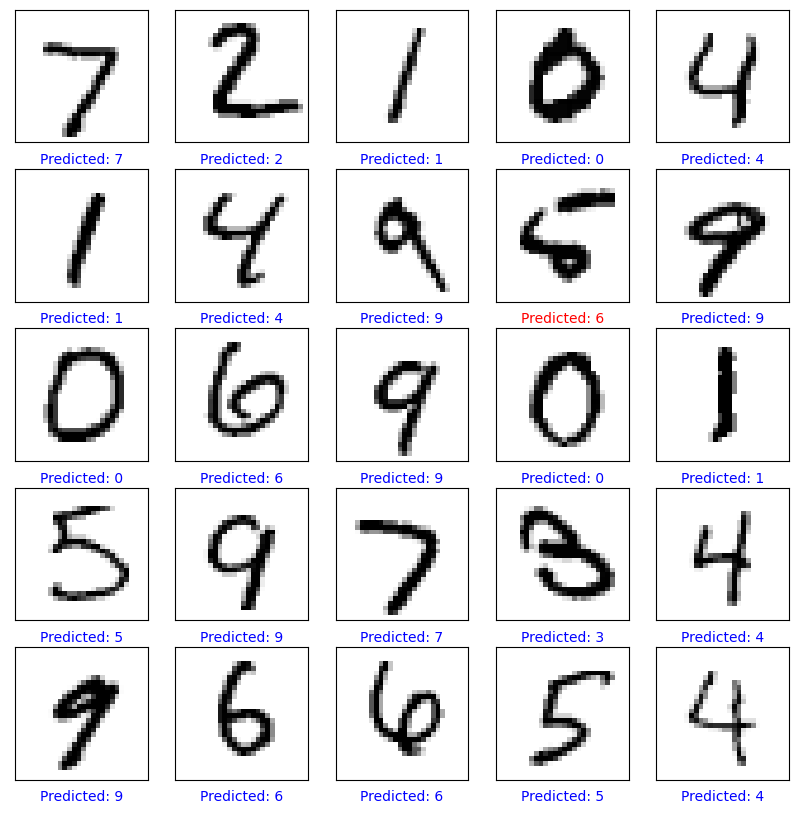

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

# 예측 부분 추가
predictions = network.predict(test_images)

# 시각화 부분 추가
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i].argmax()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}', color=color)
plt.show()




In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# # 데이터 생성
# np.random.seed(0)
# X = np.random.rand(100, 1)  # 0과 1 사이의 난수 100개 생성
# y = 2 * X + 1 + np.random.randn(100, 1)  # y = 2X + 1 + 잡음

# 데이터 생성
dataset = pd.read_csv('LinearRegressionData.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 생성
model = Sequential()
model.add(Dense(1, input_dim=1))  # 입력 뉴런 1개, 출력 뉴런 1개인 Dense 레이어 추가

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = model.fit(X, y, epochs=10000, verbose=0)

# 훈련 결과 시각화
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# # 테스트 데이터 생성
# X_test = np.linspace(0, 1, 100).reshape(-1, 1)


# 예측 수행
y_pred = model.predict(X_test)

# 결과 시각화
plt.scatter(X, y, label='Training data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
